In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]# 꽃잎의 너비와 길이
y = (iris.target == 0).astype(np.int64) # setosa 인가?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

print(y_pred)

[0]


Perceptron

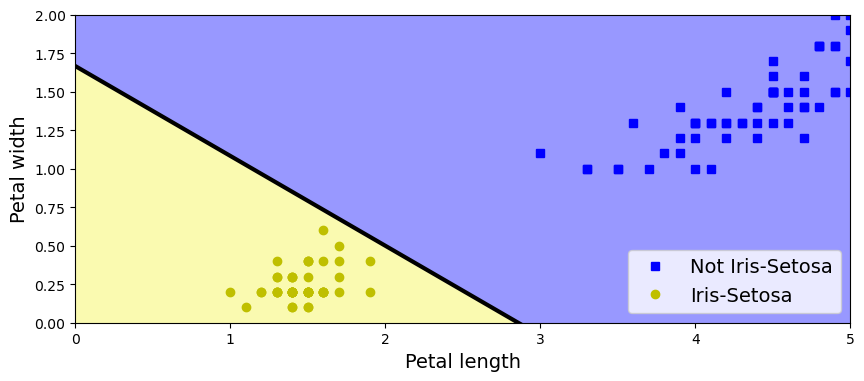

In [2]:
import matplotlib.pyplot as plt
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

Activation Functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

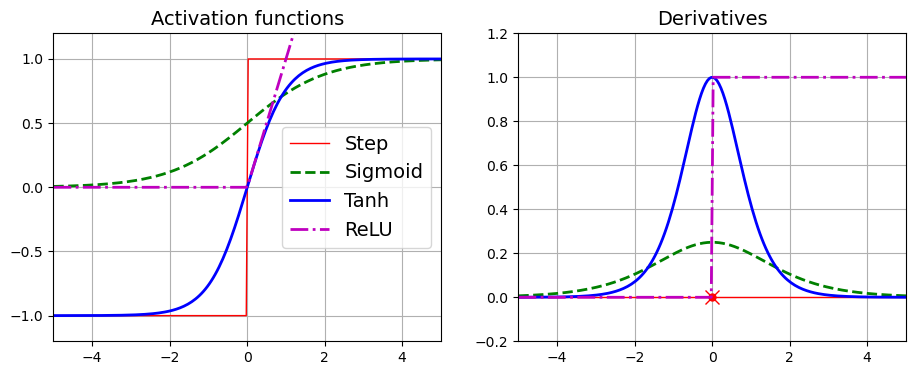

In [4]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [5]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

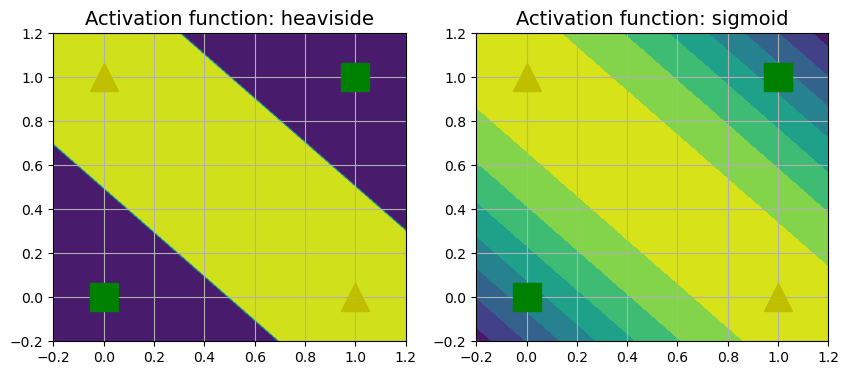

In [6]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

Building an Image Classifier

In [7]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.15.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [11]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker"
    "Bag",
    "Ankle boot"
]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
model.get_layer("dense_3") is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04324137, -0.05286602, -0.0450832 , ...,  0.05546203,
         0.04441606,  0.01382355],
       [-0.03966078,  0.015319  ,  0.06802171, ..., -0.06227276,
         0.01129579,  0.0229727 ],
       [-0.0672761 ,  0.00330749, -0.02649416, ...,  0.0717026 ,
        -0.02847708, -0.01882662],
       ...,
       [ 0.07366876,  0.03354118, -0.0570562 , ...,  0.01754162,
         0.04257133,  0.02283531],
       [-0.07437833,  0.06089386, -0.06478978, ..., -0.02930405,
        -0.0247839 ,  0.01197805],
       [-0.0025699 ,  0.02943549,  0.01154523, ..., -0.01108536,
         0.02277714,  0.00546324]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 2s 1ms/step - loss: 0.7312 - accuracy: 0.7606 - val_loss: 0.5690 - val_accuracy: 0.7984
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4931 - accuracy: 0.8296 - val_loss: 0.4485 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4450 - accuracy: 0.8439 - val_loss: 0.4408 - val_accuracy: 0.8486
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4166 - accuracy: 0.8538 - val_loss: 0.3918 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3966 - accuracy: 0.8605 - val_loss: 0.3896 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3801 - accuracy: 0.8669 - val_loss: 0.3746 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3672 - accuracy: 0.8702 - val_loss: 0.3698 - val_accurac

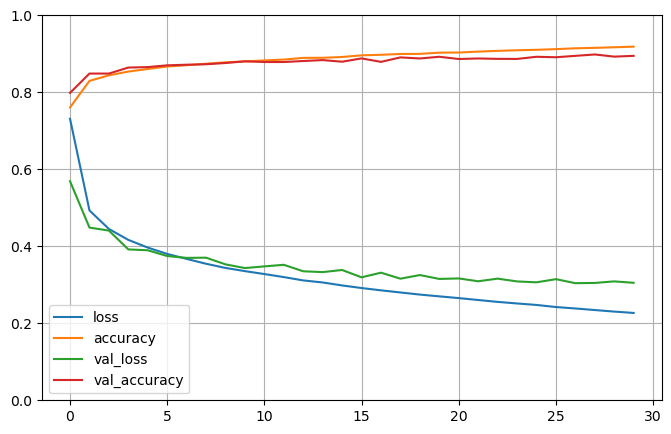

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위를 [0-1] 사이로 설정한다.
plt.show()

In [26]:
X_new = X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 14ms/step


array([9, 2, 1], dtype=int64)

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 979us/step - loss: 1.9603 - val_loss: 0.9645
Epoch 2/20
363/363 [==============================] - 0s 708us/step - loss: 0.7633 - val_loss: 0.7671
Epoch 3/20
363/363 [==============================] - 0s 704us/step - loss: 0.6778 - val_loss: 0.7187
Epoch 4/20
363/363 [==============================] - 0s 710us/step - loss: 0.6398 - val_loss: 0.6856
Epoch 5/20
363/363 [==============================] - 0s 728us/step - loss: 0.6098 - val_loss: 0.6574
Epoch 6/20
363/363 [==============================] - 0s 716us/step - loss: 0.5844 - val_loss: 0.6341
Epoch 7/20
363/363 [==============================] - 0s 707us/step - loss: 0.5638 - val_loss: 0.6141
Epoch 8/20
363/363 [==============================] - 0s 709us/step - loss: 0.5466 - val_loss: 0.5978
Epoch 9/20
363/363 [==============================] - 0s 717us/step - loss: 0.5306 - val_loss: 0.5832
Epoch 10/20
363/363 [==============================] - 0s 706us/step - loss: 0.517

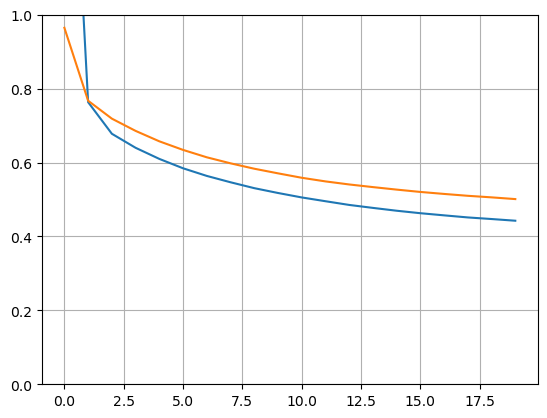

In [31]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
y_pred

array([[1.2397935],
       [2.8628335],
       [2.4068453]], dtype=float32)

Functional API

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30, activation="relu")(input_)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_, hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_], outputs=[output])

In [34]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B=keras.layers.Input(shape=[6], name="deep_input")
hidden1=keras.layers.Dense(30, activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1,name="output")(concat)
model=keras.Model(inputs=[input_A,input_B],outputs=[output])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B=X_train[:,:5], X_train[:, 2:]
X_valid_A, X_valid_B=X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B=X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history=model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test=model.evaluate((X_test_A,X_test_B), y_test)
y_pred=model.predict((X_new_A,X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2530 - val_loss: 1.0567
Epoch 2/20
363/363 [==============================] - 0s 804us/step - loss: 0.7771 - val_loss: 0.7339
Epoch 3/20
363/363 [==============================] - 0s 800us/step - loss: 0.6544 - val_loss: 0.6774
Epoch 4/20
363/363 [==============================] - 0s 779us/step - loss: 0.6079 - val_loss: 0.6431
Epoch 5/20
363/363 [==============================] - 0s 782us/step - loss: 0.5748 - val_loss: 0.6157
Epoch 6/20
363/363 [==============================] - 0s 757us/step - loss: 0.5498 - val_loss: 0.5939
Epoch 7/20
363/363 [==============================] - 0s 824us/step - loss: 0.5278 - val_loss: 0.5776
Epoch 8/20
363/363 [==============================] - 0s 761us/step - loss: 0.5139 - val_loss: 0.5606
Epoch 9/20
363/363 [==============================] - 0s 758us/step - loss: 0.4965 - val_loss: 0.5474
Epoch 10/20
363/363 [==============================] - 0s 755us/step - loss: 0.4857 

In [36]:
# 보조 출력
output=keras.layers.Dense(1, name="main_output")(concat)
aux_output=keras.layers.Dense(1, name="aux_output")(hidden2)
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

In [37]:
model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [38]:
history=model.fit(
    [X_train_A, X_train_B],[y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7894 - main_output_loss: 0.7183 - aux_output_loss: 1.4292 - val_loss: 0.7026 - val_main_output_loss: 0.6743 - val_aux_output_loss: 0.9578
Epoch 2/20
363/363 [==============================] - 0s 901us/step - loss: 0.5411 - main_output_loss: 0.4994 - aux_output_loss: 0.9162 - val_loss: 0.7491 - val_main_output_loss: 0.7204 - val_aux_output_loss: 1.0068
Epoch 3/20
363/363 [==============================] - 0s 855us/step - loss: 0.4938 - main_output_loss: 0.4572 - aux_output_loss: 0.8236 - val_loss: 0.4989 - val_main_output_loss: 0.4669 - val_aux_output_loss: 0.7868
Epoch 4/20
363/363 [==============================] - 0s 859us/step - loss: 0.4379 - main_output_loss: 0.4065 - aux_output_loss: 0.7204 - val_loss: 0.4766 - val_main_output_loss: 0.4512 - val_aux_output_loss: 0.7056
Epoch 5/20
363/363 [==============================] - 0s 859us/step - loss: 0.4244 - main_output_loss: 0.3984 - aux_output_loss: 0.6589 - 

In [39]:
total_loss, main_loss, aux_loss=model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

162/162 [==============================] - 0s 534us/step - loss: 0.3514 - main_output_loss: 0.3394 - aux_output_loss: 0.4594


In [40]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 42ms/step


In [41]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # 표준 매개변수 처리
        self.hidden1=keras.layers.Dense(units, activation=activation)
        self.hidden2=keras.layers.Dense(units, activation=activation)
        self.main_output=keras.layers.Dense(1)
        self.aux_output=keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1=self.hidden1(input_B)
        hidden2=self.hidden2(hidden1)
        concat=keras.layers.concatenate([input_A, hidden2])
        main_output=self.main_output(concat)
        aux_output=self.aux_output(hidden2)
        return main_output, aux_output

model=WideAndDeepModel()

모델 저장과 복원

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 983us/step - loss: 1.8353 - val_loss: 1.3588
Epoch 2/10
363/363 [==============================] - 0s 755us/step - loss: 0.8636 - val_loss: 0.7889
Epoch 3/10
363/363 [==============================] - 0s 699us/step - loss: 0.6867 - val_loss: 0.7046
Epoch 4/10
363/363 [==============================] - 0s 696us/step - loss: 0.6214 - val_loss: 0.6539
Epoch 5/10
363/363 [==============================] - 0s 715us/step - loss: 0.5832 - val_loss: 0.6210
Epoch 6/10
363/363 [==============================] - 0s 750us/step - loss: 0.5524 - val_loss: 0.5984
Epoch 7/10
363/363 [==============================] - 0s 844us/step - loss: 0.5267 - val_loss: 0.5715
Epoch 8/10
363/363 [==============================] - 0s 802us/step - loss: 0.5059 - val_loss: 0.5542
Epoch 9/10
363/363 [==============================] - 0s 807us/step - loss: 0.4881 - val_loss: 0.5364
Epoch 10/10
162/162 [==============================] - 0s 485us/step - loss: 0.475

In [44]:
model.save("my_keras_model.h5")

c:\Users\Yes\anaconda3\envs\study\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
model=keras.models.load_model("my_keras_model.h5")

Using Callbacks during Training

In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.1695 - val_loss: 1.3169
Epoch 2/10
363/363 [==============================] - 0s 830us/step - loss: 0.8614 - val_loss: 0.7562
Epoch 3/10
363/363 [==============================] - 0s 840us/step - loss: 0.6661 - val_loss: 0.6965
Epoch 4/10
363/363 [==============================] - 0s 804us/step - loss: 0.6194 - val_loss: 0.6633
Epoch 5/10
363/363 [==============================] - 0s 768us/step - loss: 0.5900 - val_loss: 0.6367
Epoch 6/10
363/363 [==============================] - 0s 787us/step - loss: 0.5657 - val_loss: 0.6152
Epoch 7/10
363/363 [==============================] - 0s 785us/step - loss: 0.5442 - val_loss: 0.5962
Epoch 8/10
363/363 [==============================] - 0s 796us/step - loss: 0.5278 - val_loss: 0.5792
Epoch 9/10
363/363 [==============================] - 0s 762us/step - loss: 0.5119 - val_loss: 0.5653
Epoch 10/10
162/162 [==============================] - 0s 534us/step - loss: 0.5076


In [49]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 969us/step - loss: 0.4858 - val_loss: 0.5417
Epoch 2/100
363/363 [==============================] - 0s 882us/step - loss: 0.4758 - val_loss: 0.5318
Epoch 3/100
363/363 [==============================] - 0s 801us/step - loss: 0.4658 - val_loss: 0.5215
Epoch 4/100
363/363 [==============================] - 0s 959us/step - loss: 0.4569 - val_loss: 0.5120
Epoch 5/100
363/363 [==============================] - 0s 998us/step - loss: 0.4499 - val_loss: 0.5054
Epoch 6/100
363/363 [==============================] - 0s 933us/step - loss: 0.4428 - val_loss: 0.4996
Epoch 7/100
363/363 [==============================] - 0s 892us/step - loss: 0.4358 - val_loss: 0.4922
Epoch 8/100
363/363 [==============================] - 0s 897us/step - loss: 0.4298 - val_loss: 0.4861
Epoch 9/100
363/363 [==============================] - 0s 928us/step - loss: 0.4239 - val_loss: 0.4798
Epoch 10/100
363/363 [==============================] - 0s 882us/step - l

In [50]:
class PrintTrainRatioCallbback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [51]:
val_train_ratio_cb=PrintTrainRatioCallbback()
history=model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

281/363 [======================>.......] - ETA: 0s - loss: 0.3172
val/train: 1.18
363/363 [==============================] - 0s 811us/step - loss: 0.3198 - val_loss: 0.3779


TensorBoard

In [52]:
import os
import time
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir=get_run_logdir()

In [53]:
run_logdir

'.\\my_logs\\run_2024_02_17-23_47_25'

In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30 ,activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [55]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.4864 - val_loss: 0.9092
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7382 - val_loss: 0.7573
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6629 - val_loss: 0.6988
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6048 - val_loss: 0.6458
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5671 - val_loss: 0.6099
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5358 - val_loss: 0.5913
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5116 - val_loss: 0.5620
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4956 - val_loss: 0.5481
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4787 - val_loss: 0.5325
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4683 - val_loss: 0.5268

In [56]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

Hyperparameter Tuning

In [57]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [58]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
keras_reg = KerasRegressor(bulid_fn=build_model)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'